About this dataset 

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria thalach : maximum heart rate achieved

slp:slope of peak exercise ST segment, 0:downsloping 1:flat 2:upsloping

oldpeak:ST depression induced by exercise relative to rest

thall:thallassemia, 0:null,1:normal,2:fixed defect,3:reversible defect

target : 0= less chance of heart attack 1= more chance of heart attack

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
custom = ['blue','purple','blue']
sns.set_palette(custom)

Importing, Understanding, and Inspecting Data :

Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

In [5]:
df = pd.read_excel(r'C:\Users\91918\Documents\heart\data.xlsx')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df[df.duplicated(keep = 'first')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df[df.duplicated(keep = 'last')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df.shape

(303, 14)

Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(302, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.rename(columns={'cp':'chest_pain_type','trestbps':'resting_blood_pressure','chol':'cholestoral', 
                     'restecg':'resting_electrocardiographic_results',
'thalach':' maximum_heart_rate_achieved','exang':'exercise_induced_angina','oldpeak':'ST.depression(exercise/rest)','slope':'slope_of_peak_exercise',
 'ca':'no_of_major_vessels','thal':'thalassemia' },inplace=True)

In [16]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fbs,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST.depression(exercise/rest),slope_of_peak_exercise,no_of_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


 Categorical variables 'sex','Chest_Pain','fbs','resting_electrocardiographic_results','exercise_induced_angina','ca','thalassemia','slope_of_peak_exercise','target'

In [17]:
Univariate_analysis =[ 'age','resting_blood_pressure', 'cholestoral',' maximum_heart_rate_achieved',
             'ST.depression(exercise/rest)']

univariate Analysis

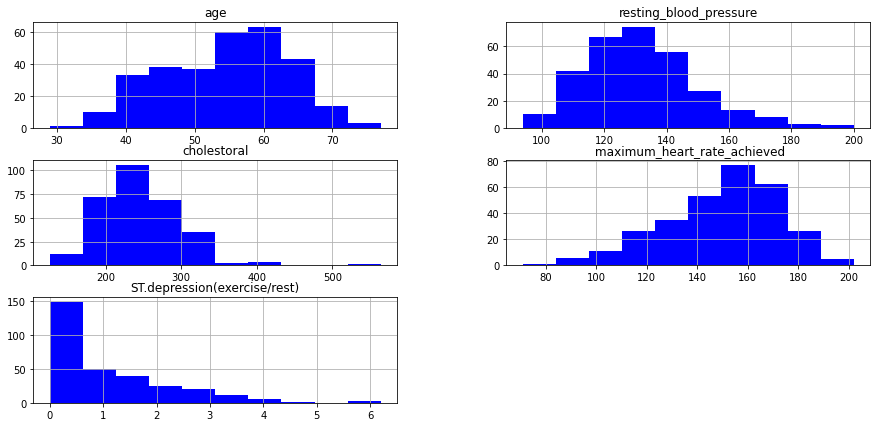

In [18]:
df[Univariate_analysis].hist(figsize=(15,7))
plt.show()

Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.

In [19]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

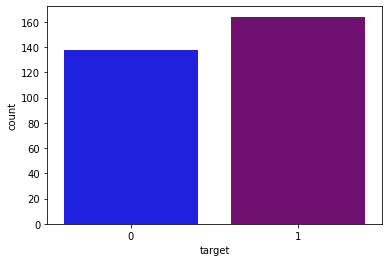

In [20]:
#1
sns.countplot(df.target)

<AxesSubplot:xlabel='sex', ylabel='count'>

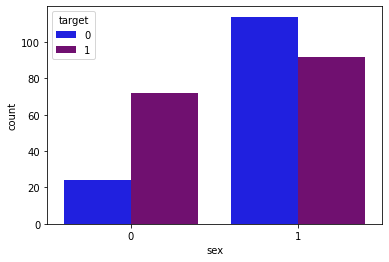

In [21]:
#2 Study the composition of overall patients w.r.t . gender.
sns.countplot(df.sex, hue  = df.target)

<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

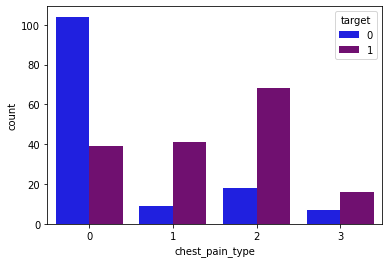

In [22]:
#3
sns.countplot(df.chest_pain_type, hue  = df.target)

<AxesSubplot:xlabel='fbs', ylabel='count'>

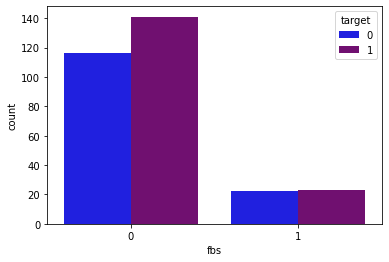

In [23]:
#4
sns.countplot(df.fbs, hue  = df.target)

<AxesSubplot:xlabel='resting_electrocardiographic_results', ylabel='count'>

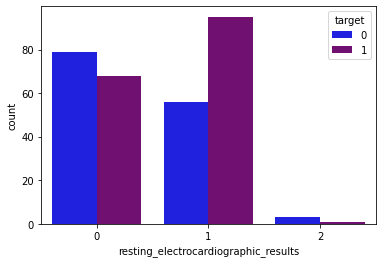

In [24]:
#5
sns.countplot(df.resting_electrocardiographic_results, hue = df.target)

<AxesSubplot:xlabel='exercise_induced_angina', ylabel='count'>

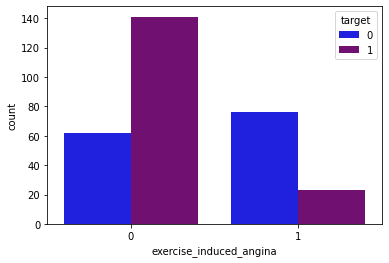

In [25]:
#6
sns.countplot(df.exercise_induced_angina, hue = df.target)

<AxesSubplot:xlabel='no_of_major_vessels', ylabel='count'>

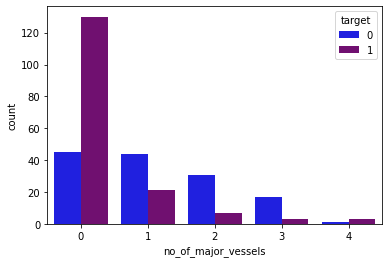

In [26]:
#7
sns.countplot(df.no_of_major_vessels, hue = df.target)

<AxesSubplot:xlabel='thalassemia', ylabel='count'>

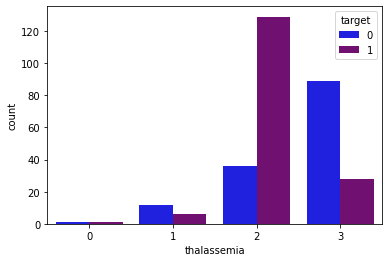

In [27]:
#8
sns.countplot(df.thalassemia, hue = df.target)

Study the occurrence of CVD across different ages.

<AxesSubplot:xlabel='age', ylabel='Density'>

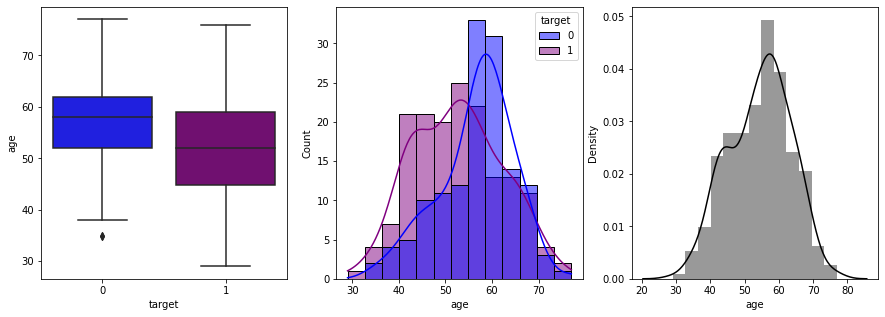

In [28]:
f,ax=plt.subplots(ncols=3,figsize=(15,5))
sns.histplot(data = df, x = 'age',hue='target', kde = True,ax = ax[1])
sns.boxplot(x='target',y='age',data = df,ax = ax[0])
sns.distplot(df.age, color = 'black')

In [29]:
age_nocvd = df.groupby(by = 'target').get_group(0)[['age']]
age_cvd = df.groupby(by = 'target').get_group(1)[['age']]

In [30]:
age_cvd.mean()

age    52.585366
dtype: float64

In [31]:
age_nocvd.mean()

age    56.601449
dtype: float64

In [32]:
ttest,p_age =stats.ttest_ind(age_cvd,age_nocvd)
p_age

array([0.00010395])

In [33]:
if p_age < 0.05:
    print('Reject Null Hypothesis Ho - There is no relation')
else:
    print('Failed to Reject Null Hypothesis Ho - There is a relation')

Reject Null Hypothesis Ho - There is no relation


we found p-value <.05, which shows that age group of people getting heart attack is significantly different from the age group of people not getting heart attack.

Can we detect heart attack based on anomalies in resting blood pressure of the patient?

<AxesSubplot:xlabel='target', ylabel='resting_blood_pressure'>

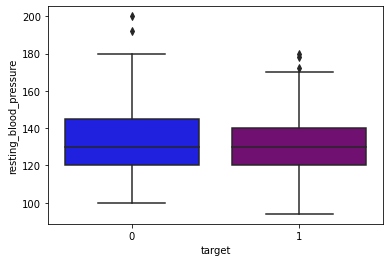

In [34]:
sns.boxplot(df.target,df.resting_blood_pressure	)

In [35]:
df.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

In [36]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,92


Describe the relationship between cholesterol levels and our target variable.

<AxesSubplot:xlabel='age', ylabel='Density'>

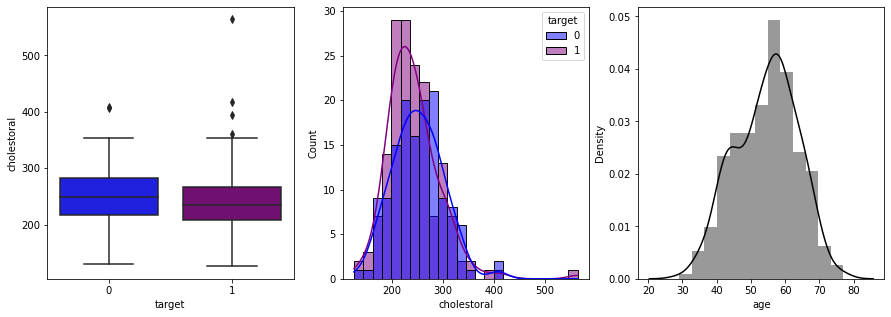

In [37]:
f,ax=plt.subplots(ncols=3,figsize=(15,5))
sns.histplot(data = df, x = 'cholestoral',hue='target', kde = True,ax = ax[1])
sns.boxplot(x='target',y='cholestoral',data = df,ax = ax[0])
sns.distplot(df.age, color = 'black')

In [38]:
chol_nocvd = df.groupby(by = 'target').get_group(0)[['cholestoral']]
chol_cvd = df.groupby(by = 'target').get_group(1)[['cholestoral']]

In [39]:
chol_nocvd.mean()

cholestoral    251.086957
dtype: float64

In [40]:
chol_cvd.mean()

cholestoral    242.640244
dtype: float64

In [41]:
print(df[['cholestoral']].describe().T)
print(chol_cvd.describe().T)
print(chol_nocvd.describe().T)

             count   mean        std    min    25%    50%     75%    max
cholestoral  302.0  246.5  51.753489  126.0  211.0  240.5  274.75  564.0
             count        mean       std    min     25%    50%     75%    max
cholestoral  164.0  242.640244  53.45658  126.0  208.75  234.5  267.25  564.0
             count        mean        std    min     25%    50%    75%    max
cholestoral  138.0  251.086957  49.454614  131.0  217.25  249.0  283.0  409.0


In [42]:
ttest,p_chol=stats.ttest_ind(chol_cvd,chol_nocvd)
p_chol

array([0.15803697])

In [43]:
if p_chol < 0.05:
    print('Reject Null Hypothesis Ho - There is no relation')
else:
    print('Failed to Reject Null Hypothesis Ho - There is a relation')

Failed to Reject Null Hypothesis Ho - There is a relation


From above graph we can see that the some person who is getting heart attack has cholestrol level even upto 500.thus high cholestrol can cause high risk of heart attack

What can be concluded about the relationship between peak exercising and occurrence of heart attack?

<AxesSubplot:xlabel='ST.depression(exercise/rest)', ylabel='count'>

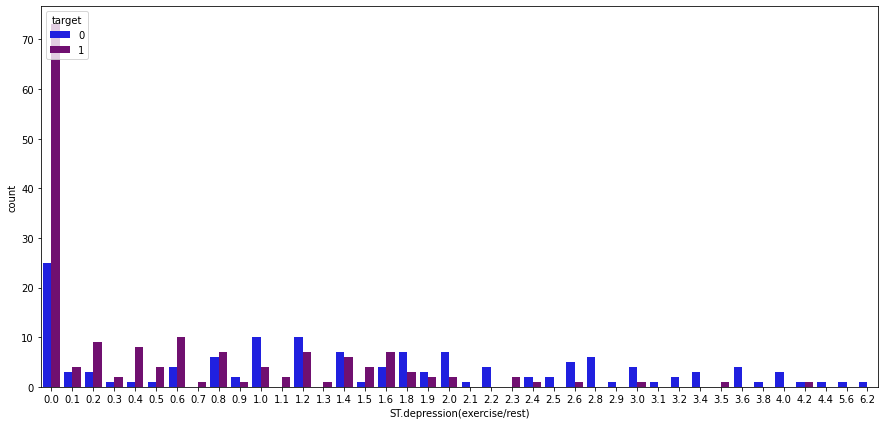

In [44]:
plt.subplots(figsize=(15,7))

sns.countplot(df['ST.depression(exercise/rest)'],hue=df.target)

In [45]:
ST_nocvd = df.groupby(by = 'target').get_group(0)[['ST.depression(exercise/rest)']]
ST_cvd = df.groupby(by = 'target').get_group(1)[['ST.depression(exercise/rest)']]

In [46]:
ttest,p_ST=stats.ttest_ind(ST_cvd,ST_nocvd)
p_ST

array([5.81456695e-15])

In [47]:
if p_ST < 0.05:
    print('Reject Null Hypothesis Ho - There is no relation')
else:
    print('Failed to Reject Null Hypothesis Ho - There is a relation')

Reject Null Hypothesis Ho - There is no relation


Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?

In [48]:
thal_nocvd = df.groupby(by = 'target').get_group(0)['thalassemia']
thal_cvd = df.groupby(by = 'target').get_group(1)['thalassemia']

In [49]:
ttest,p_thal = stats.ttest_ind(thal_cvd,thal_nocvd)
p_thal

9.089044024817941e-10

In [50]:
if p_thal < 0.05:
    print('Reject Null Hypothesis - There is no relation')
else:
    print('Failed to Reject Null Hypothesis - There is a relation')

Reject Null Hypothesis - There is no relation


Use a pair plot to understand the relationship between all the given variables.

Bivariate Analysis

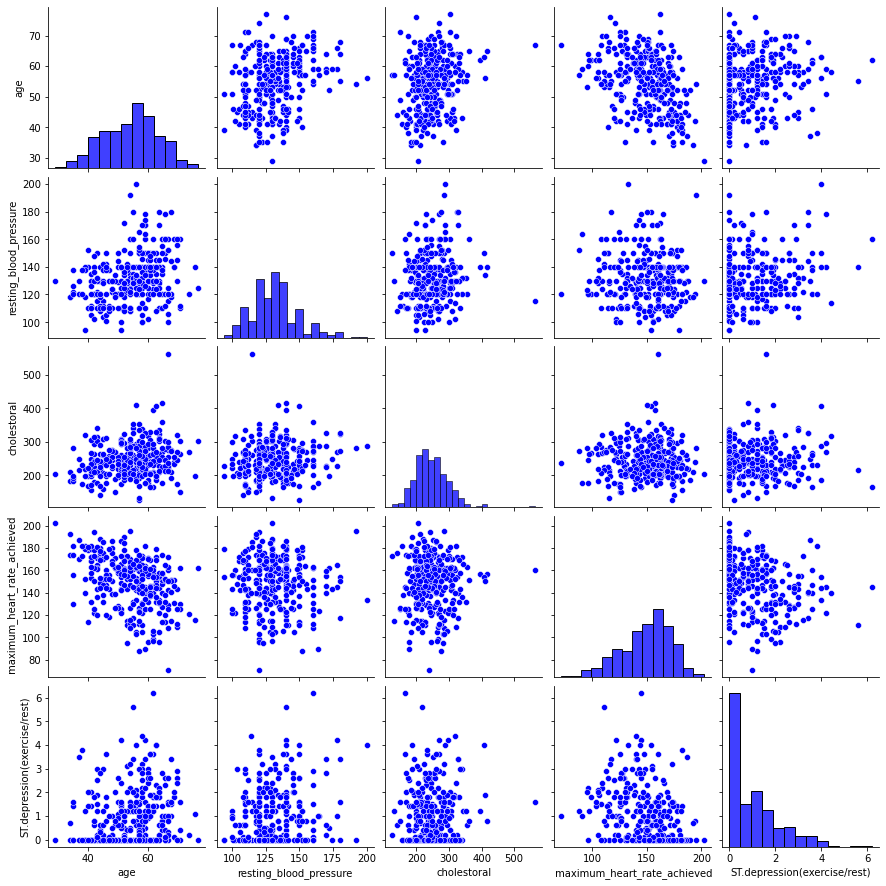

In [51]:
sns.pairplot(df[Univariate_analysis])

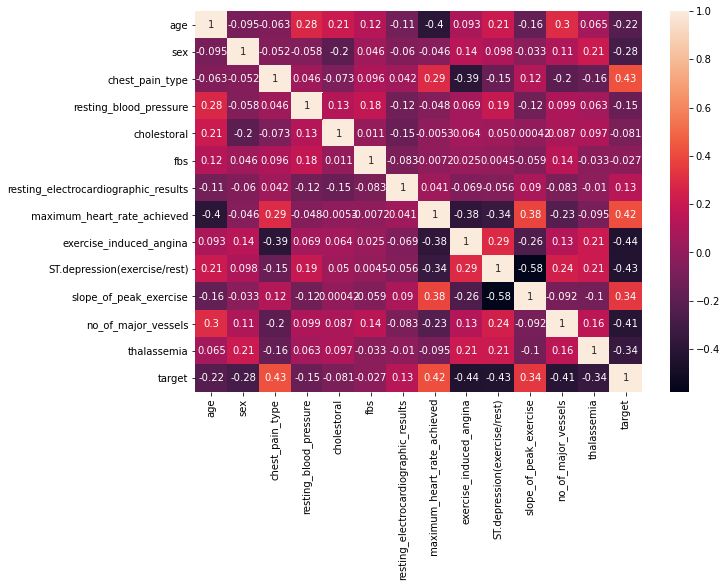

In [52]:
# Heatmap of the correlation
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)
plt.show()

Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

In [53]:
# Reordering the columns for easier feature scaling
df=df[['age','resting_blood_pressure','cholestoral','ST.depression(exercise/rest)','sex','chest_pain_type','fbs','resting_electrocardiographic_results','exercise_induced_angina','slope_of_peak_exercise','no_of_major_vessels','thalassemia','target']]
df.head()

,age,resting_blood_pressure,cholestoral,ST.depression(exercise/rest),sex,chest_pain_type,fbs,resting_electrocardiographic_results,exercise_induced_angina,slope_of_peak_exercise,no_of_major_vessels,thalassemia,target
0,63,145,233,2.3,1,3,1,0,0,0,0,1,1
1,37,130,250,3.5,1,2,0,1,0,0,0,2,1
2,41,130,204,1.4,0,1,0,0,0,2,0,2,1
3,56,120,236,0.8,1,1,0,1,0,2,0,2,1
4,57,120,354,0.6,0,0,0,1,1,2,0,2,1


In [54]:
X= df.iloc[:,:-1].values
Y= df.iloc[:,-1].values

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X[:,0:5]=sc.fit_transform(X[:,0:5])

In [56]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,Y,test_size=0.25,random_state=1)

In [57]:
# Training the model
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(Xtrain,Ytrain)

LogisticRegression()

In [58]:
LogisticRegression()
Ypredicted= lr.predict(Xtest)


In [59]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Ytest,Ypredicted)
print('Confusion matrix : ')
print(cm)

Confusion matrix : 
[[28  8]
 [ 7 33]]


In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: ',accuracy_score(Ytest,Ypredicted))
print('Precision score: ',precision_score(Ytest,Ypredicted))
print('Recall score: ',recall_score(Ytest,Ypredicted))
print('F1 score: ',f1_score(Ytest,Ypredicted))

Accuracy score:  0.8026315789473685
Precision score:  0.8048780487804879
Recall score:  0.825
F1 score:  0.8148148148148149


In [61]:
lr.score(Xtrain,Ytrain)

0.8539823008849557

In [62]:
lr.score(Xtest,Ytest)

0.8026315789473685